In [1]:
import tensorflow as tf
##tf.enable_eager_execution()
import tensorflow_datasets as tfds
tfds.disable_progress_bar()


#helper libraries

import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset, metadata = tfds.load('fashion_mnist',as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
print(train_dataset)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

<_OptionsDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>


In [4]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("NUmber of training examples: {}".format(num_train_examples))
print("Number of training examples: {}".format(num_test_examples))

NUmber of training examples: 60000
Number of training examples: 10000


In [5]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

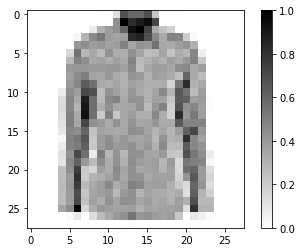

In [6]:
for image, label in test_dataset.take(1):
    break

image = image.numpy().reshape((28,28))


plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

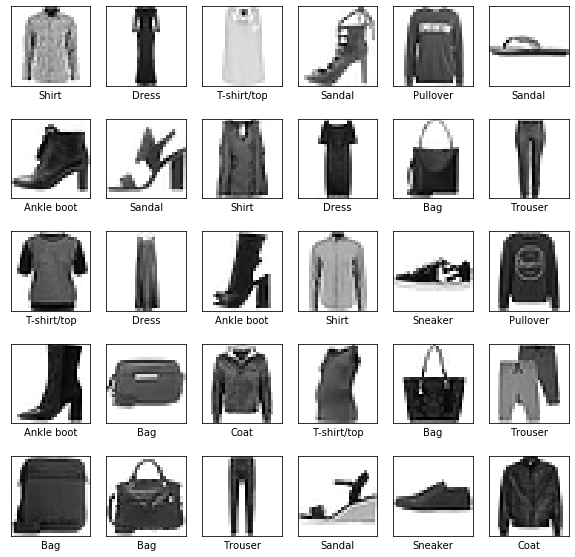

In [7]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(30):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap = plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [8]:
som = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding='same',activation = tf.nn.relu,
                           input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2), strides =2),
    tf.keras.layers.Conv2D(64,(3,3),padding = 'same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2),strides = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [9]:
som.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [10]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [11]:
som.fit(train_dataset, epochs = 5, steps_per_epoch = math.ceil(num_train_examples/BATCH_SIZE))

Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4041 - accuracy: 0.8535
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2582 - accuracy: 0.9061
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2169 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1862 - accuracy: 0.9314
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1567 - accuracy: 0.9430


In [12]:
test_loss, test_accuracy = som.evaluate(test_dataset, steps = math.ceil(num_test_examples/32))
print('Accuracy on test dataset: ', test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.2679 - accuracy: 0.9098
Accuracy on test dataset:  0.9098


In [13]:
for test_images , test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = som.predict(test_images)
    

In [14]:
predictions.shape

(32, 10)

In [15]:
##print(predictions)

In [16]:
np.argmax(predictions[0])

6

In [17]:
test_labels[0]

6

In [18]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

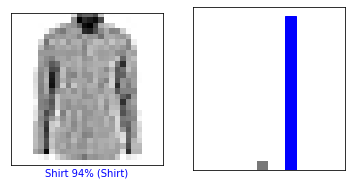

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

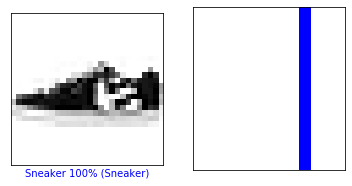

In [20]:
i = 16
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

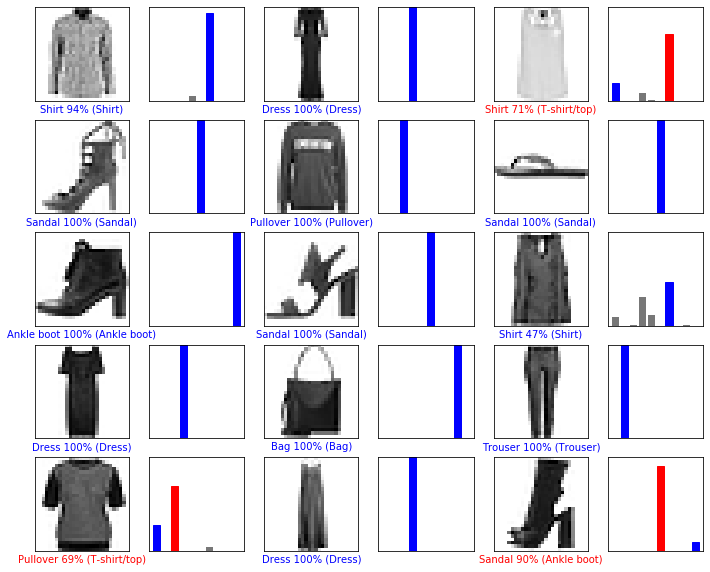

In [21]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [22]:
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [23]:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [24]:
predictions_single = som.predict(img)

print(predictions_single)

[[4.0519085e-06 1.6271944e-10 4.2698742e-04 7.1287782e-06 5.6521755e-02
  6.5238011e-09 9.4303960e-01 3.9726697e-08 1.0744022e-07 3.4235370e-07]]


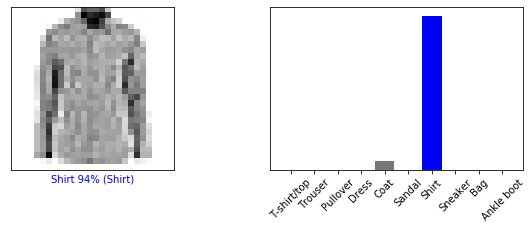

In [25]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plot_image(0, predictions_single, test_labels, img)
plt.subplot(1,2,2)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [26]:
np.argmax(predictions_single[0])

6

In [27]:
class_names[np.argmax(predictions_single[0])]

'Shirt'

In [28]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [29]:
sess = tf.compat.v1.Session(config= tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1

